In [167]:
# 01 Umbralización Simple
# 02 Umbralización Adaptativa 
# 03 Métodos de Otsu y Riddler

In [168]:
!pip install mahotas

### Importar librerías

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import mahotas
import cv2

### Función para mostrar la imagen

In [170]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

### Diccionario para los argumentos

In [171]:
args = {"imagen":"lapices_foto.jpg"}

### Carga la imagen y la muestra

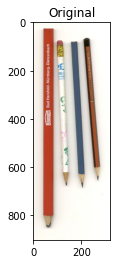

In [172]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

## --> Conviérte la imagen a escala de grises y la difumina ligeramente

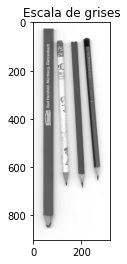

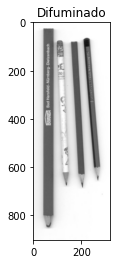

In [173]:
imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
difuminado = cv2.GaussianBlur(imagen,(5,5),0)
mostrar_imagen("Escala de grises",imagen)
mostrar_imagen("Difuminado",difuminado)

# Umbralización Simple

Apliquemos un umbral básico. El primer parámetro es la imagen al que se establece el umbral. El segundo valor es la verificación de umbral (por ejemplo 150), si el valor de un píxel es mayor a que el umbral (en este ejemplo mayor a 150) será BLANCO, de lo contario será NEGRO.

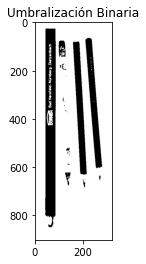

In [174]:
(T,umb)=cv2.threshold(difuminado,150,255,cv2.THRESH_BINARY)
mostrar_imagen("Umbralización Binaria",umb)

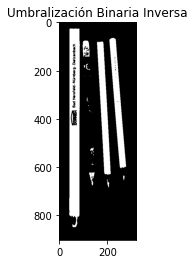

In [175]:
(T,umbInv)=cv2.threshold(difuminado,150,255,cv2.THRESH_BINARY_INV)
mostrar_imagen("Umbralización Binaria Inversa",umbInv)

Podemos usar el umbral inverso como máscara y visualizar solamente las monedas en la imagen

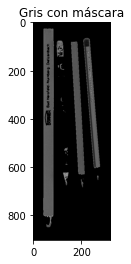

In [176]:
imagen_mascara = cv2.bitwise_and(imagen, imagen, mask = umbInv)
mostrar_imagen("Gris con máscara",imagen_mascara)

# Umbralización Adaptativa

En el ejemplo anterior, tuvimos que especificar manualmente un valor de píxel para establecer el umbral global de la imagen. En este ejemplo,
examinaremos un grupo vecino de píxeles y aplicaremos el umbral de forma adaptativa a cada grupo vecino. En este ejemplo, calcularemos el
valor promedio del área de vecindad de 11 píxeles y el umbral en función de ese valor. Finalmente, nuestra constante C se resta del cálculo de la
media (en este caso 4)

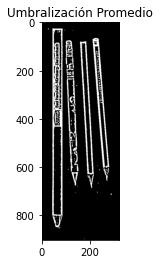

In [177]:
umbral = cv2.adaptiveThreshold(difuminado, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV,11, 3)
mostrar_imagen("Umbralización Promedio",umbral)

Támbién podemos usar el umbral de Gauss de la siguiente manera

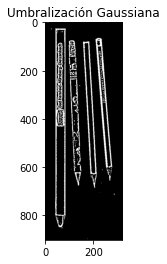

In [178]:
umbral2 = cv2.adaptiveThreshold(difuminado, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 15, 4)

mostrar_imagen("Umbralización Gaussiana",umbral2)

# Métodos de Otsu y Riddler-Calvard

OpenCV proporciona métodos para usar el umbral de Otsu, pero se usa la implementación de mahotas que es más cercana a Python. El método
de Otsu asume que hay dos 'picos' en el histograma de escala de grises. Encuentra estos picos y luego devuelve un valor en el que deberíamos
establecer un umbral.

In [179]:
T = mahotas.thresholding.otsu(difuminado)
print("Umbral de Otsu: {}".format(T))

Umbral de Otsu: 169


La aplicación del umbral se puede hacer usando NumPy, donde los valores menores que el umbral se establecen en cero y los valores por encima del umbral se establecen en 255 (blanco).

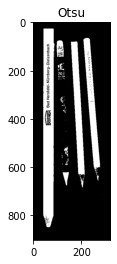

In [180]:
umbr = imagen.copy()
umbr[umbr > T] = 255
umbr[umbr < 255] = 0
umbr = cv2.bitwise_not(umbr)
mostrar_imagen("Otsu",umbr)

Una alternativa es usar el método de Riddler-Calvard

In [181]:
T = mahotas.thresholding.rc(difuminado)
print("Riddler-Calvard: {}".format(T))

Riddler-Calvard: 169.36357137417417


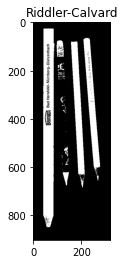

In [182]:
umbr = imagen.copy()
umbr[umbr > T] = 255
umbr[umbr < 255] = 0
umbr = cv2.bitwise_not(umbr)
mostrar_imagen("Riddler-Calvard",umbr)